In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avito-demand-prediction/periods_train.csv
/kaggle/input/avito-demand-prediction/train_jpg_0.zip
/kaggle/input/avito-demand-prediction/sample_submission.csv
/kaggle/input/avito-demand-prediction/train_jpg_3.zip
/kaggle/input/avito-demand-prediction/train_jpg_4.zip
/kaggle/input/avito-demand-prediction/train_active.csv
/kaggle/input/avito-demand-prediction/test_active.csv
/kaggle/input/avito-demand-prediction/train_jpg_2.zip
/kaggle/input/avito-demand-prediction/train_jpg_1.zip
/kaggle/input/avito-demand-prediction/train.csv
/kaggle/input/avito-demand-prediction/test.csv
/kaggle/input/avito-demand-prediction/periods_test.csv
/kaggle/input/avito-demand-prediction/test_jpg.zip
/kaggle/input/avito-demand-prediction/train_jpg.zip


> In their fourth Kaggle competition, Avito is challenging you to predict demand for an online advertisement based on its full description (title, description, images, etc.), its context (geographically where it was posted, similar ads already posted) and historical demand for similar ads in similar contexts. With this information, Avito can inform sellers on how to best optimize their listing and provide some indication of how much interest they should realistically expect to receive.



- item_id - Ad id.
- user_id - User id.
- region - Ad region.
- city - Ad city.
- parent_category_name - Top level ad category as classified by Avito’s ad model.
- category_name - Fine grain ad category as classified by Avito’s ad model.
- param_1 - Optional parameter from Avito’s ad model.
- param_2 - Optional parameter from Avito’s ad model.
- param_3 - Optional parameter from Avito’s ad model.
- title - Ad title.
- description - Ad description.
- price - Ad price.
- item_seq_number - Ad sequential number for user.
- activation_date- Date ad was placed.
- user_type - User type.
- image - Id code of image. Ties to a jpg file in train_jpg. Not every ad has an image.
- image_top_1 - Avito’s classification code for the image.
- deal_probability - The target variable. This is the likelihood that an ad actually sold something. It’s not possible to verify every transaction with certainty, so this column’s value can be any float from zero to one.


In [2]:
df_train = pd.read_csv("../input/avito-demand-prediction/train.csv")
df_test = pd.read_csv("../input/avito-demand-prediction/test.csv")

df_train.shape, df_test.shape

((1503424, 18), (508438, 17))

In [3]:
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   item_id               1503424 non-null  object 
 1   user_id               1503424 non-null  object 
 2   region                1503424 non-null  object 
 3   city                  1503424 non-null  object 
 4   parent_category_name  1503424 non-null  object 
 5   category_name         1503424 non-null  object 
 6   param_1               1441848 non-null  object 
 7   param_2               848882 non-null   object 
 8   param_3               640859 non-null   object 
 9   title                 1503424 non-null  object 
 10  description           1387148 non-null  object 
 11  price                 1418062 non-null  float64
 12  item_seq_number       1503424 non-null  int64  
 13  activation_date       1503424 non-null  object 
 14  user_type             1503424 non-

Изучение nan'ов

In [5]:
is_nan = df_train.isna().sum() / len(df_train) * 100
print("NaN values in train Dataset")
print(is_nan[is_nan > 0].sort_values(ascending=False))

NaN values in train Dataset
param_3        57.373369
param_2        43.536753
description     7.734079
image           7.488772
image_top_1     7.488772
price           5.677839
param_1         4.095718
dtype: float64


Изучение уникальных значений в признаках

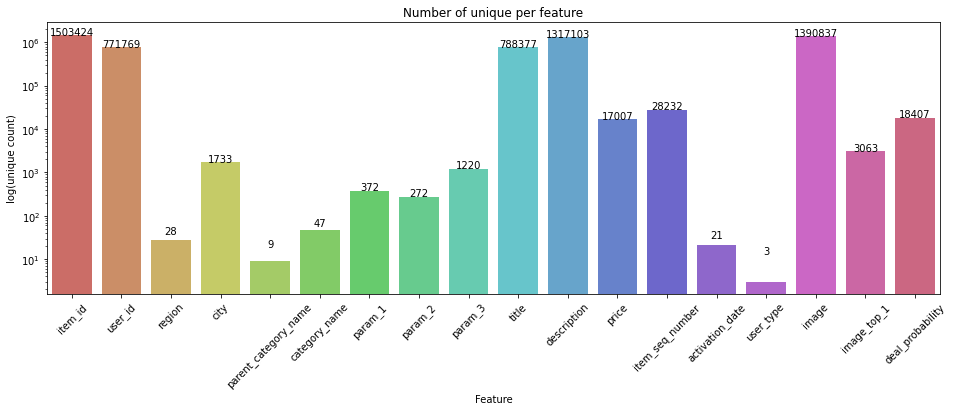

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16, 5))

cols = df_train.columns
uniques = [len(df_train[col].unique()) for col in cols]

ax = sns.barplot(x=cols, y=uniques, palette='hls', log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique per feature')


for p, uniq in zip(ax.patches, uniques):
    ax.text(p.get_x() + p.get_width()/2.,
            uniq + 10,
            uniq,
            ha="center") 

ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

### Изучение целевого признака

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


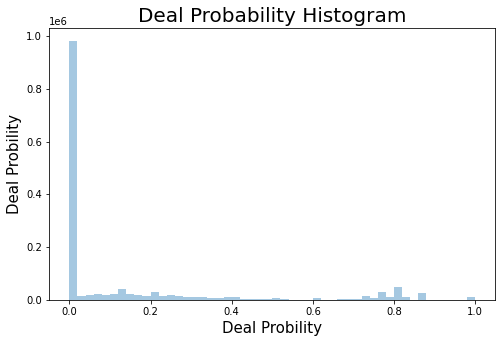

In [7]:
plt.figure(figsize=(8, 5))

ax = sns.distplot(df_train["deal_probability"].values, bins=50, kde=False)
ax.set_xlabel('Deal Probility', fontsize=15)
ax.set_ylabel('Deal Probility', fontsize=15)
ax.set_title("Deal Probability Histogram", fontsize=20);

In [8]:
df_train["deal_prob_cat"] = pd.cut(df_train.deal_probability, bins=10)
df_train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,deal_prob_cat
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,"(0.1, 0.2]"
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,"(-0.001, 0.1]"
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,"(0.4, 0.5]"
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,"(0.8, 0.9]"
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,"(0.2, 0.3]"


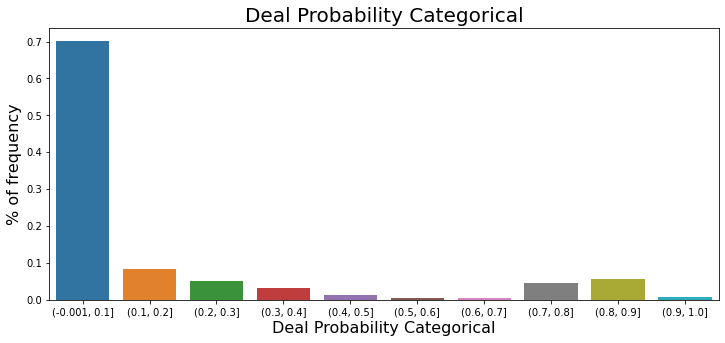

In [9]:
prob_cat_percent = df_train["deal_prob_cat"].value_counts(normalize=True)

plt.figure(figsize=(12,5))
g = sns.barplot(x=prob_cat_percent.index, y=prob_cat_percent.values)
g.set_xlabel('Deal Probability Categorical',fontsize=16)
g.set_ylabel('% of frequency', fontsize=16)
g.set_title('Deal Probability Categorical', fontsize=20)
plt.show()

### Изучение признаков

**Регион и город**

In [10]:
df_train.groupby(['region', 'city']).count()['user_id']

region               city       
Алтайский край       Алейск           198
                     Алтайское         78
                     Баево             10
                     Барнаул        27460
                     Белокуриха       527
                                    ...  
Ярославская область  Семибратово       44
                     Туношна            4
                     Тутаев           427
                     Углич            556
                     Ярославль      25098
Name: user_id, Length: 1804, dtype: int64

In [11]:
city_ads = df_train.groupby('city').agg(
    {'deal_probability': ['mean', 'count']}
).reset_index().sort_values([('deal_probability', 'mean')], ascending=False).reset_index(drop=True)

city_ads

city deal_probability      
                                mean count
0       Приволжский         0.826680     2
1           Матмасы         0.737600     1
2              Виля         0.737600     1
3     Быстрогорский         0.595410     1
4         Бурлацкое         0.571207     4
...             ...              ...   ...
1728          Исток         0.000000     1
1729  Новоильинский         0.000000     1
1730       Убинское         0.000000     2
1731         Игарка         0.000000     1
1732         Сомово         0.000000     2

[1733 rows x 3 columns]

In [12]:
print(f"There are {len(df_train.city.unique())} cities in total.")
print(f"There are {city_ads[city_ads['deal_probability']['count'] > 100].shape[0]} cities with more that 100 ads.")
print(f"There are {city_ads[city_ads['deal_probability']['count'] > 1000].shape[0]} cities with more that 1000 ads.")
print(f"There are {city_ads[city_ads['deal_probability']['count'] > 10000].shape[0]} cities with more that 10000 ads.")

There are 1733 cities in total.
There are 486 cities with more that 100 ads.
There are 147 cities with more that 1000 ads.
There are 33 cities with more that 10000 ads.


**Регион**

In [13]:
df_train['region'].value_counts()

Краснодарский край         141416
Свердловская область        94475
Ростовская область          89995
Татарстан                   81284
Челябинская область         78339
Нижегородская область       73643
Самарская область           73407
Башкортостан                68291
Пермский край               62704
Новосибирская область       62486
Красноярский край           53442
Саратовская область         49645
Волгоградская область       48998
Кемеровская область         44635
Воронежская область         44116
Иркутская область           44030
Омская область              42939
Алтайский край              41520
Ставропольский край         39187
Тюменская область           35411
Ярославская область         32814
Калининградская область     32756
Оренбургская область        29303
Белгородская область        28868
Ханты-Мансийский АО         28709
Удмуртия                    28537
Владимирская область        26741
Тульская область            25733
Name: region, dtype: int64

In [14]:
data = df_train['region'].value_counts().iloc[:10]
data

Краснодарский край       141416
Свердловская область      94475
Ростовская область        89995
Татарстан                 81284
Челябинская область       78339
Нижегородская область     73643
Самарская область         73407
Башкортостан              68291
Пермский край             62704
Новосибирская область     62486
Name: region, dtype: int64

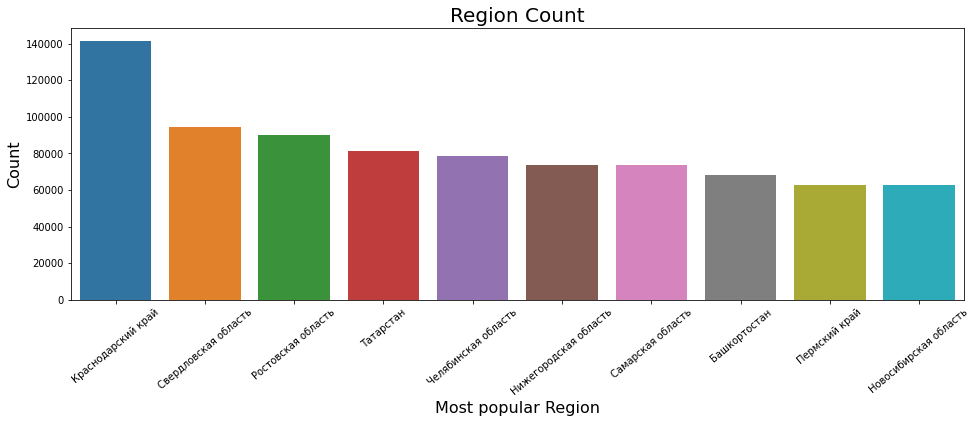

In [15]:
plt.figure(figsize=(16,5))

ax = sns.barplot(x=data.index, y=data.values)
ax.set_xlabel('Most popular Region', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Region Count', fontsize=20)
plt.xticks(rotation=40);

**Город**

In [16]:
df_train['city'].value_counts()

Краснодар          63638
Екатеринбург       63602
Новосибирск        56929
Ростов-на-Дону     52323
Нижний Новгород    52010
                   ...  
Бешпагир               1
Нижняя Пойма           1
Быстрогорский          1
Сява                   1
Ломинцевский           1
Name: city, Length: 1733, dtype: int64

In [17]:
data = df_train['city'].value_counts().iloc[:10]
data

Краснодар          63638
Екатеринбург       63602
Новосибирск        56929
Ростов-на-Дону     52323
Нижний Новгород    52010
Челябинск          48380
Пермь              46720
Казань             46663
Самара             41875
Омск               41412
Name: city, dtype: int64

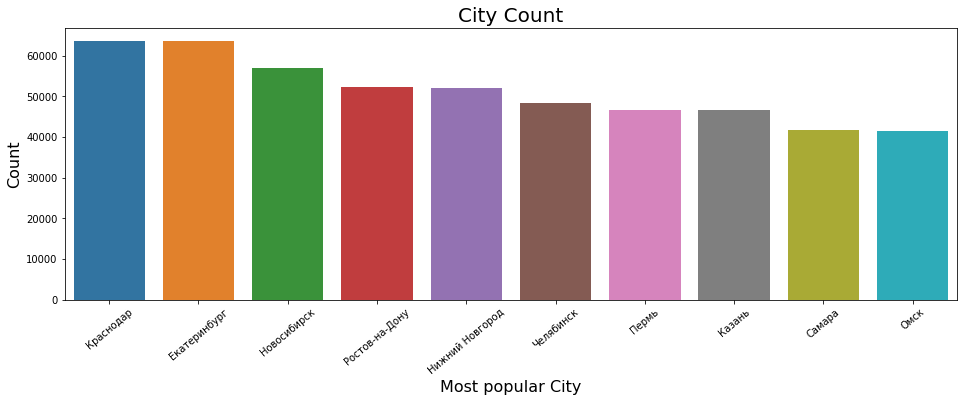

In [18]:
plt.figure(figsize=(16,5))

ax = sns.barplot(x=data.index, y=data.values)
ax.set_xlabel('Most popular City', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('City Count', fontsize=20)
plt.xticks(rotation=40);

**Категория**

In [19]:
df_train.groupby(['parent_category_name', 'category_name']).count()['user_id']

parent_category_name  category_name               
Бытовая электроника   Аудио и видео                    27036
                      Игры, приставки и программы      11167
                      Настольные компьютеры             5450
                      Ноутбуки                         10297
                      Оргтехника и расходники           6580
                      Планшеты и электронные книги      8624
                      Телефоны                         65944
                      Товары для компьютера            29565
                      Фототехника                       8345
Для бизнеса           Готовый бизнес                    2028
                      Оборудование для бизнеса         16047
Для дома и дачи       Бытовая техника                  33705
                      Мебель и интерьер                65035
                      Посуда и товары для кухни         9076
                      Продукты питания                  5781
                      Растения    

In [20]:
data = df_train['parent_category_name'].value_counts().iloc[:10]
data

Личные вещи            697623
Для дома и дачи        178823
Бытовая электроника    173008
Недвижимость           153190
Хобби и отдых           86011
Транспорт               79839
Услуги                  64385
Животные                52470
Для бизнеса             18075
Name: parent_category_name, dtype: int64

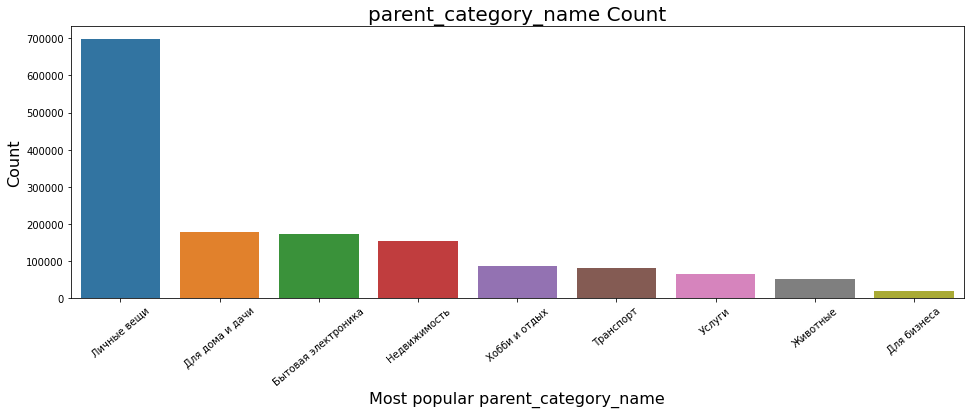

In [21]:
plt.figure(figsize=(16,5))

ax = sns.barplot(x=data.index, y=data.values)
ax.set_xlabel('Most popular parent_category_name', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('parent_category_name Count', fontsize=20)
plt.xticks(rotation=40);

In [22]:
data = df_train['category_name'].value_counts().iloc[:10]
data

Одежда, обувь, аксессуары     282753
Детская одежда и обувь        270359
Товары для детей и игрушки     99747
Квартиры                       83670
Телефоны                       65944
Мебель и интерьер              65035
Предложение услуг              64385
Автомобили                     62494
Ремонт и строительство         56201
Бытовая техника                33705
Name: category_name, dtype: int64

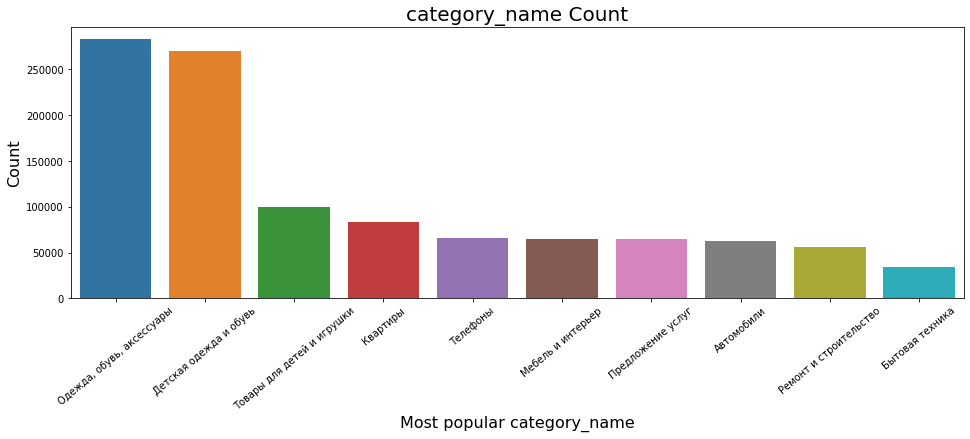

In [23]:
plt.figure(figsize=(16,5))

ax = sns.barplot(x=data.index, y=data.values)
ax.set_xlabel('Most popular category_name', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('category_name Count', fontsize=20)
plt.xticks(rotation=40);

**param**

In [24]:
df_train['param_1'].value_counts()

Женская одежда    226289
Для девочек       151979
Для мальчиков     117772
Продам            113764
С пробегом         61024
                   ...  
Уральский рекс         1
SkyLink                1
Лхаса Апсо             1
Ла-перм лаперм         1
Бриар                  1
Name: param_1, Length: 371, dtype: int64

In [25]:
data = df_train['param_1'].value_counts().iloc[:10]
data

Женская одежда     226289
Для девочек        151979
Для мальчиков      117772
Продам             113764
С пробегом          61024
Аксессуары          38568
Мужская одежда      35716
Другое              27874
Игрушки             26442
Детские коляски     26248
Name: param_1, dtype: int64

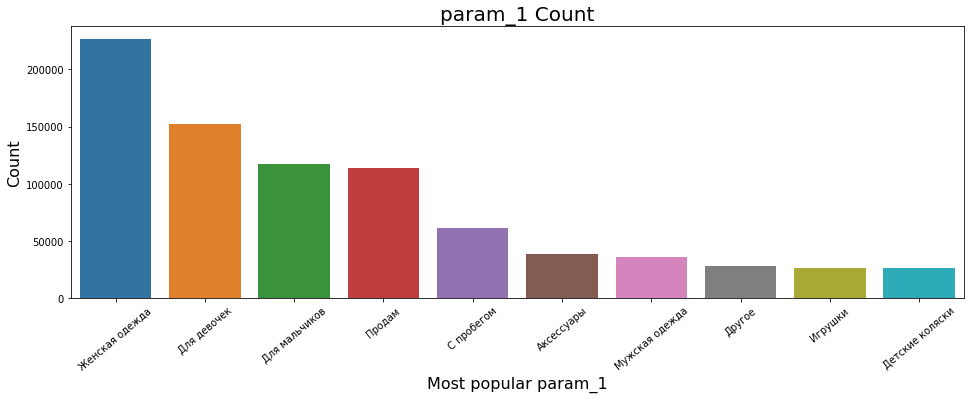

In [26]:
plt.figure(figsize=(16,5))

ax = sns.barplot(x=data.index, y=data.values)
ax.set_xlabel('Most popular param_1', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('param_1 Count', fontsize=20)
plt.xticks(rotation=40);

In [27]:
data = df_train['param_2'].value_counts().iloc[:10]
data

Обувь                 150450
Верхняя одежда        141860
Платья и юбки          69483
Другое                 36284
Трикотаж               31684
Брюки                  25807
1                      23426
2                      22921
На длительный срок     22096
Дом                    20550
Name: param_2, dtype: int64

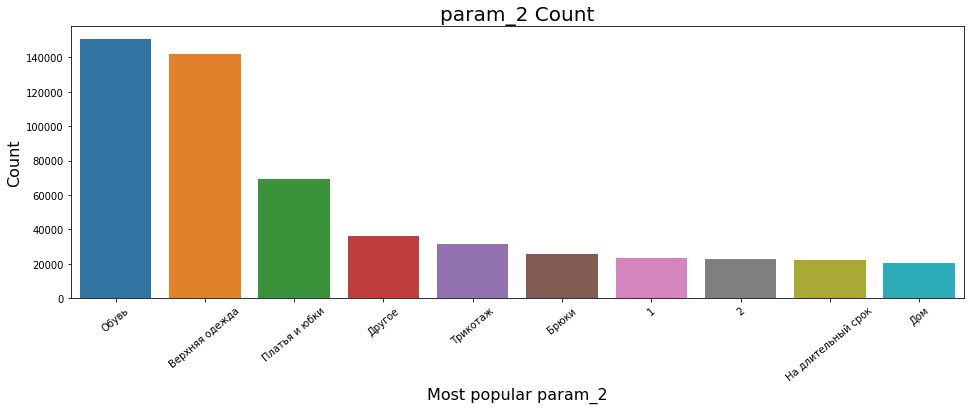

In [28]:
plt.figure(figsize=(16,5))

ax = sns.barplot(x=data.index, y=data.values)
ax.set_xlabel('Most popular param_2', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('param_2 Count', fontsize=20)
plt.xticks(rotation=40);

In [29]:
data = df_train['param_3'].value_counts().iloc[:10]
data

Вторичка                50615
42–44 (S)               47915
44–46 (M)               35854
86-92 см (1-2 года)     29139
98-104 см (2-4 года)    25774
74-80 см (7-12 мес)     23708
Без размера             19494
40–42 (XS)              19041
110-116 см (4-6 лет)    18896
46–48 (L)               18783
Name: param_3, dtype: int64

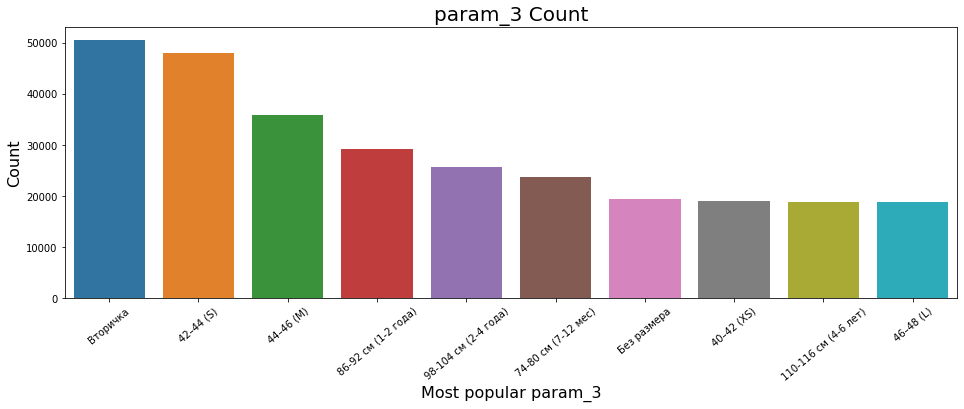

In [30]:
plt.figure(figsize=(16,5))

ax = sns.barplot(x=data.index, y=data.values)
ax.set_xlabel('Most popular param_3', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('param_3 Count', fontsize=20)
plt.xticks(rotation=40);

**param1 + param2 + param3**

In [31]:
df_train['params'] = df_train['param_1'].fillna('') + ' ' + df_train['param_2'].fillna('') + ' ' + df_train['param_3'].fillna('')
df_train['params'] = df_train['params'].str.strip()
df_train['params'].value_counts()

                                     61576
Другое                               27874
Игрушки                              26442
Детские коляски                      26248
Аксессуары                           23839
                                     ...  
Новые УАЗ 3741                           1
Куплю 7                                  1
С пробегом MINI John Cooper Works        1
С пробегом Nissan Altima                 1
Бриар                                    1
Name: params, Length: 2306, dtype: int64

In [32]:
from nltk.util import ngrams
from collections import Counter


text = ' '.join(df_train['params'].values)
text = [i for i in ngrams(text.lower().split(), 3)]
print('Common trigrams.')
Counter(text).most_common(40)

Common trigrams.


[(('платья', 'и', 'юбки'), 69483),
 (('одежда', 'верхняя', 'одежда'), 66198),
 (('женская', 'одежда', 'обувь'), 59639),
 (('женская', 'одежда', 'верхняя'), 55499),
 (('женская', 'одежда', 'платья'), 46433),
 (('одежда', 'платья', 'и'), 46433),
 (('для', 'девочек', 'обувь'), 41776),
 (('для', 'девочек', 'верхняя'), 41244),
 (('девочек', 'верхняя', 'одежда'), 41244),
 (('для', 'мальчиков', 'обувь'), 38317),
 (('для', 'мальчиков', 'верхняя'), 34418),
 (('мальчиков', 'верхняя', 'одежда'), 34418),
 (('86-92', 'см', '(1-2'), 29139),
 (('см', '(1-2', 'года)'), 29139),
 (('98-104', 'см', '(2-4'), 25774),
 (('см', '(2-4', 'года)'), 25774),
 (('на', 'длительный', 'срок'), 24839),
 (('74-80', 'см', '(7-12'), 23708),
 (('см', '(7-12', 'мес)'), 23708),
 (('для', 'девочек', 'платья'), 23050),
 (('девочек', 'платья', 'и'), 23050),
 (('с', 'пробегом', 'ваз'), 19099),
 (('пробегом', 'ваз', '(lada)'), 19099),
 (('110-116', 'см', '(4-6'), 18896),
 (('см', '(4-6', 'лет)'), 18896),
 (('продам', '2', 'втори

In [33]:
del text

**title**

In [34]:
df_train['title'].value_counts()

Платье                                               15550
Туфли                                                 6334
Куртка                                                6331
Пальто                                                5251
Джинсы                                                4758
                                                     ...  
Новые кожанные ботиночки                                 1
Куртка-комбинезон "HM"                                   1
Картерс 3-6 мес                                          1
Подвес прямой                                            1
Кукольные домики из берез. фанеры (большой выбор)        1
Name: title, Length: 788377, dtype: int64

In [35]:
data = df_train['title'].value_counts().iloc[:10]
data

Платье        15550
Туфли          6334
Куртка         6331
Пальто         5251
Джинсы         4758
Комбинезон     4506
Кроссовки      3196
Костюм         2916
Ботинки        2876
Босоножки      2760
Name: title, dtype: int64

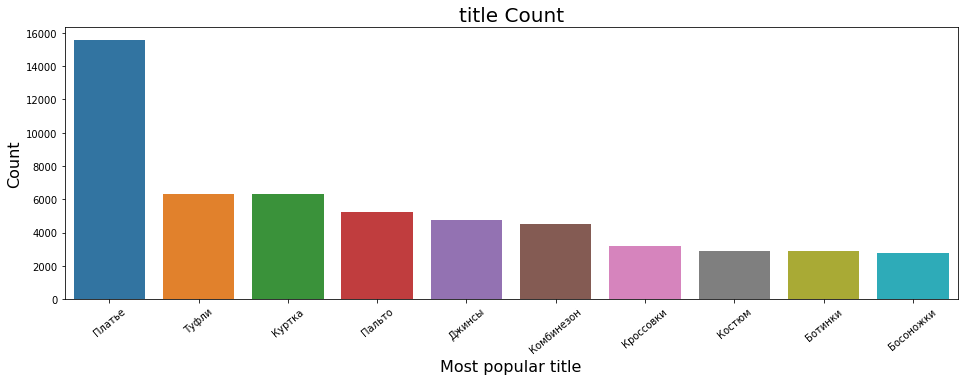

In [36]:
plt.figure(figsize=(16,5))

ax = sns.barplot(x=data.index, y=data.values)
ax.set_xlabel('Most popular title', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('title Count', fontsize=20)
plt.xticks(rotation=40);

**user_type**

In [37]:
pie_data = df_train['user_type'].value_counts()
pie_data

Private    1075706
Company     347249
Shop         80469
Name: user_type, dtype: int64

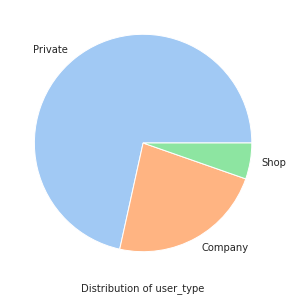

In [38]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))

colors = sns.color_palette('pastel')
ax.pie(pie_data.values, labels=pie_data.index, colors=colors)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of user_type')
plt.show()

**item_seq_number**

In [39]:
df_train['item_seq_number'].value_counts()

1        90378
2        58481
3        48047
4        42074
5        37679
         ...  
59469        1
13879        1
23506        1
71711        1
71005        1
Name: item_seq_number, Length: 28232, dtype: int64

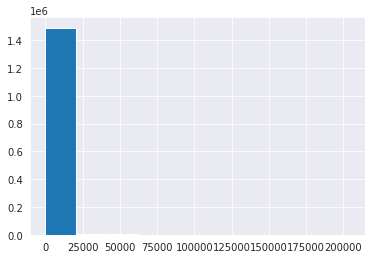

In [40]:
df_train['item_seq_number'].hist();

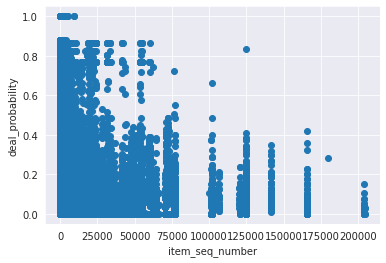

In [41]:
plt.scatter(df_train.item_seq_number, df_train.deal_probability, label='item_seq_number vs deal_probability');
plt.xlabel('item_seq_number');
plt.ylabel('deal_probability');

**price**

In [42]:
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

In [43]:
df_train['price'].describe()

count       1418062.000
mean         316708.088
std        66891542.103
min               0.000
25%             500.000
50%            1300.000
75%            7000.000
max     79501011850.000
Name: price, dtype: float64

In [44]:
df_train[df_train['price'] > 100_000_000]

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,deal_prob_cat,params
5805,199741869525,dd6248ab69d5,Краснодарский край,Сочи,Недвижимость,"Дома, дачи, коттеджи",Продам,Дом,NaN,Дом 850 м² на участке 20 сот.,ПРОДАЖА БЕЗ ПОСРЕДНИКОВ!/\nДом построен из мон...,150000000.000,26,2017-03-17,Company,5df57a2ad072af6914161dcf74c43a309fd1bc8f671f17...,2218.000,0.000,"(-0.001, 0.1]",Продам Дом
9244,d26641cacd4e,3e7d3c7f5c1b,Краснодарский край,Сочи,Недвижимость,"Дома, дачи, коттеджи",Продам,Дом,NaN,Дом 1200 м² на участке 15 сот.,Вила в Красной Пояне 4 уровня 1200 м2. Самое с...,250000000.000,33,2017-03-20,Company,5f9e3f99f8aa98181e0b1b3950fe397aa6264fda2ca2ff...,1752.000,0.131,"(0.1, 0.2]",Продам Дом
14369,56e1b5dc4415,a2e421277844,Владимирская область,Владимир,Бытовая электроника,Телефоны,Highscreen,NaN,NaN,Смарт,"продам на запчасти Win Joy , аккумулятор отдел...",400100300.000,34,2017-03-21,Private,feae0509aafbdd11c177942b2062d8286afd05896b8ff6...,2924.000,0.000,"(-0.001, 0.1]",Highscreen
27508,16499c72ad60,624cae37b363,Пермский край,Пермь,Недвижимость,Коммерческая недвижимость,Продам,Торговое помещение,NaN,"Торговое помещение, 2708.9 м²","Готовый бизнес, спортивно-гостиничный комплекс...",120000000.000,2853,2017-03-15,Company,adb352504c5df1c24429dd1d19e1f658b89c8651b107b8...,1397.000,0.047,"(-0.001, 0.1]",Продам Торговое помещение
35670,9301eae3688e,624cae37b363,Пермский край,Пермь,Недвижимость,Коммерческая недвижимость,Продам,Торговое помещение,NaN,"Торговое помещение, от 123 м² до 1277.69 м²","Помещение под супермаркет в ЖК «Новый Центр», ...",108604500.000,2892,2017-03-21,Company,41460fa076fcf52b9ad8579dc10f9fc95aa3133c9bbe76...,2218.000,0.129,"(0.1, 0.2]",Продам Торговое помещение
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490650,b4fb9e65d1c3,4d2eb0bfc2a4,Краснодарский край,Краснодар,Недвижимость,Земельные участки,Продам,Промназначения,NaN,Участок 9 га (промназначения),Продаю земельный участок по трассе Краснодар-Н...,195000000.000,47188,2017-03-28,Shop,89b7ef7708807e72b6f6b46a6a33810494f2333547994f...,1190.000,0.056,"(-0.001, 0.1]",Продам Промназначения
1490819,03b12cede47b,57575b96a905,Удмуртия,Ижевск,Бытовая электроника,Телефоны,Samsung,NaN,NaN,Телефоны на запчасти,"fly, samsung, МТС.",200100200.000,4,2017-03-28,Private,86b8702890de0193fca8aea37fa19cc8482fbc7169e0d7...,2916.000,0.248,"(0.2, 0.3]",Samsung
1499857,6bd90cbf6987,bd220ee34444,Краснодарский край,Сочи,Недвижимость,Земельные участки,Продам,Поселений (ИЖС),NaN,Участок 47 сот. (ИЖС),СРОЧНАЯ Продажа земельного участка в «ЗОЛОТОМ ...,117500000.000,202,2017-03-16,Company,40beb37d30b134269ad4b87a75e37c9b0467f0f8a77b84...,1743.000,0.408,"(0.4, 0.5]",Продам Поселений (ИЖС)
1501437,fb67b7a1433d,79d5d9aa7889,Краснодарский край,Сочи,Недвижимость,Коммерческая недвижимость,Продам,Гостиница,NaN,"Продам гостиница, 1457 м²",В микрорайоне Мамайка на закрытой и благоустро...,200000000.000,7217,2017-03-22,Shop,218ec5631e74e395b8075e201bc30b5f9cf48f9b76dd09...,2218.000,0.022,"(-0.001, 0.1]",Продам Гостиница


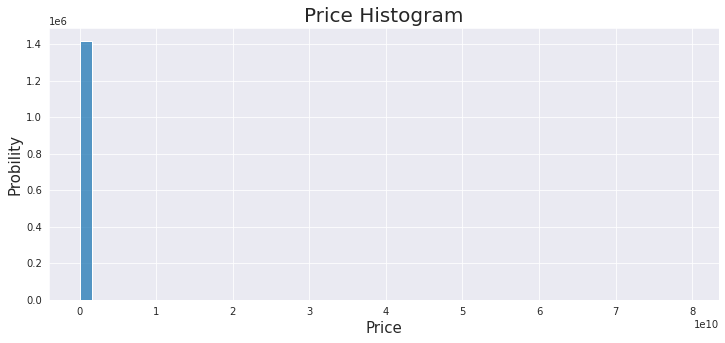

In [45]:
plt.figure(figsize=(12,5))

g = sns.histplot(df_train['price'].dropna(), bins=50)
g.set_xlabel('Price', fontsize=15)
g.set_ylabel('Probility', fontsize=15)
g.set_title("Price Histogram", fontsize=20);

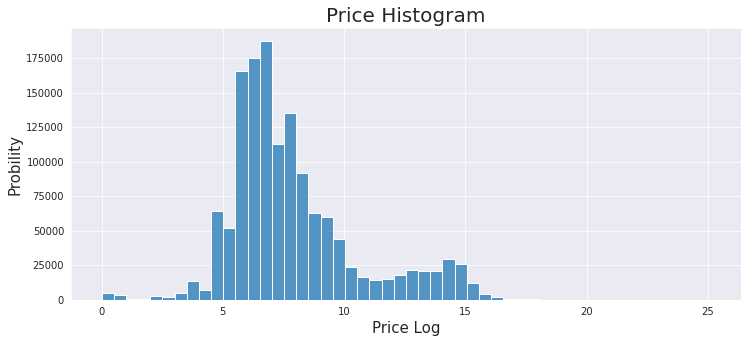

In [46]:
df_train['price_log'] = np.log(df_train['price'] + 1)

plt.figure(figsize=(12,5))

g = sns.histplot(df_train['price_log'].dropna(), bins=50)
g.set_xlabel('Price Log', fontsize=15)
g.set_ylabel('Probility', fontsize=15)
g.set_title("Price Histogram", fontsize=20);

In [47]:
np.exp(5), np.exp(10)

(148.4131591025766, 22026.465794806718)

### Взаимное распределение

**Price**

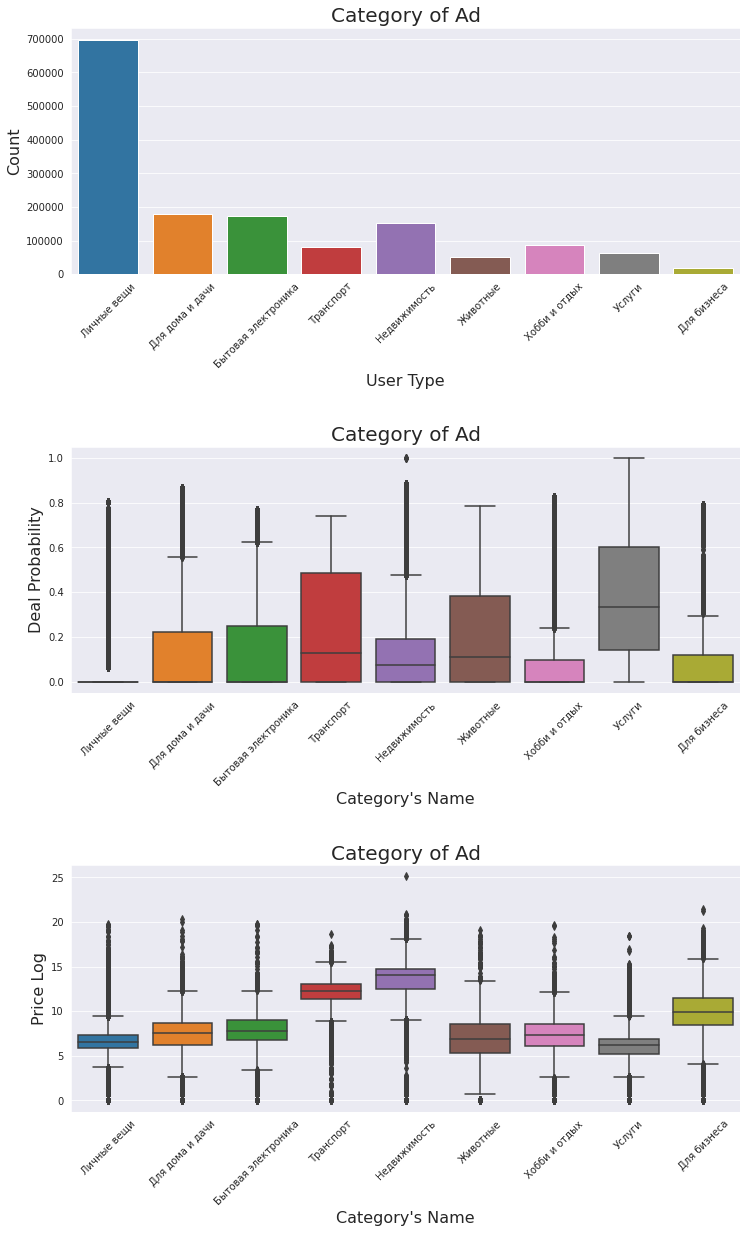

In [48]:
plt.figure(figsize=(12,14))

plt.subplot(3,1,1)
g = sns.countplot(x='parent_category_name', data=df_train)
g.set_xlabel('User Type', fontsize=16)
g.set_ylabel('Count', fontsize=16)
g.set_title('Category of Ad', fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(x='parent_category_name',y='deal_probability', data=df_train)
g1.set_xlabel("Category's Name", fontsize=16)
g1.set_ylabel('Deal Probability', fontsize=16)
g1.set_title('Category of Ad', fontsize=20)
g1.set_xticklabels(g.get_xticklabels(), rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(x='parent_category_name', y='price_log', data=df_train)
g2.set_xlabel("Category's Name", fontsize=16)
g2.set_ylabel('Price Log', fontsize=16)
g2.set_title('Category of Ad', fontsize=20)
g2.set_xticklabels(g1.get_xticklabels(), rotation=45)

plt.subplots_adjust(hspace=0.7, top=1.2)

In [49]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train['parent_category_name'],
            df_train['deal_prob_cat']).style.background_gradient(cmap=cm)

deal_prob_cat,"(-0.001, 0.1]","(0.1, 0.2]","(0.2, 0.3]","(0.3, 0.4]","(0.4, 0.5]","(0.5, 0.6]","(0.6, 0.7]","(0.7, 0.8]","(0.8, 0.9]","(0.9, 1.0]"
parent_category_name,,,,,,,,,,
Бытовая электроника,111770,13321,9931,7681,1653,442,585,27625,0,0
Для бизнеса,13325,1870,1078,119,115,120,53,1395,0,0
Для дома и дачи,118028,13115,9330,9063,1790,216,446,568,26267,0
Животные,25379,5269,4511,7040,876,134,194,9067,0,0
Личные вещи,579607,41554,21169,4110,1357,554,1073,787,47412,0
Недвижимость,89557,26407,15823,6078,4165,2095,1793,6258,1009,5
Транспорт,37052,7982,5907,4479,4779,1077,837,17726,0,0
Услуги,15235,11190,5434,7592,4531,4347,408,5277,300,10071
Хобби и отдых,64808,5436,3626,1868,660,143,193,243,9034,0


In [50]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train['parent_category_name'],
            df_train['deal_prob_cat'],
            normalize='index').style.background_gradient(cmap=cm)

deal_prob_cat,"(-0.001, 0.1]","(0.1, 0.2]","(0.2, 0.3]","(0.3, 0.4]","(0.4, 0.5]","(0.5, 0.6]","(0.6, 0.7]","(0.7, 0.8]","(0.8, 0.9]","(0.9, 1.0]"
parent_category_name,,,,,,,,,,
Бытовая электроника,0.646039,0.076996,0.057402,0.044397,0.009554,0.002555,0.003381,0.159675,0.000000,0.000000
Для бизнеса,0.737206,0.103458,0.059640,0.006584,0.006362,0.006639,0.002932,0.077178,0.000000,0.000000
Для дома и дачи,0.660027,0.073341,0.052174,0.050681,0.010010,0.001208,0.002494,0.003176,0.146888,0.000000
Животные,0.483686,0.100419,0.085973,0.134172,0.016695,0.002554,0.003697,0.172804,0.000000,0.000000
Личные вещи,0.830831,0.059565,0.030344,0.005891,0.001945,0.000794,0.001538,0.001128,0.067962,0.000000
Недвижимость,0.584614,0.172381,0.103290,0.039676,0.027188,0.013676,0.011704,0.040851,0.006587,0.000033
Транспорт,0.464084,0.099976,0.073986,0.056100,0.059858,0.013490,0.010484,0.222022,0.000000,0.000000
Услуги,0.236623,0.173798,0.084399,0.117916,0.070374,0.067516,0.006337,0.081960,0.004659,0.156418
Хобби и отдых,0.753485,0.063201,0.042157,0.021718,0.007673,0.001663,0.002244,0.002825,0.105033,0.000000


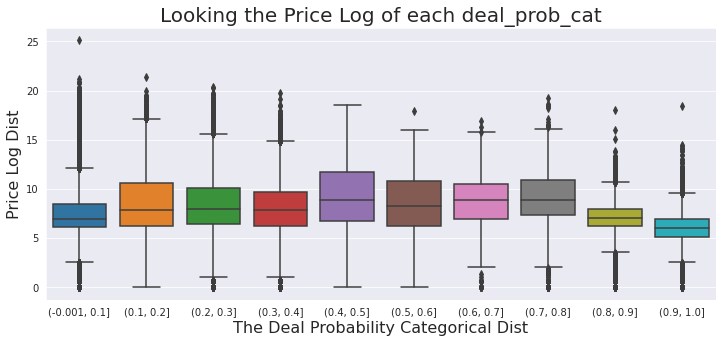

In [51]:
df_train['price_log'] = np.log(df_train['price'] + 1)

plt.figure(figsize=(12,5))

g = sns.boxplot(x='deal_prob_cat', y='price_log', data=df_train)
g.set_xlabel('The Deal Probability Categorical Dist', fontsize=16)
g.set_ylabel('Price Log Dist', fontsize=16)
g.set_title('Looking the Price Log of each deal_prob_cat', fontsize=20);

**Regions**

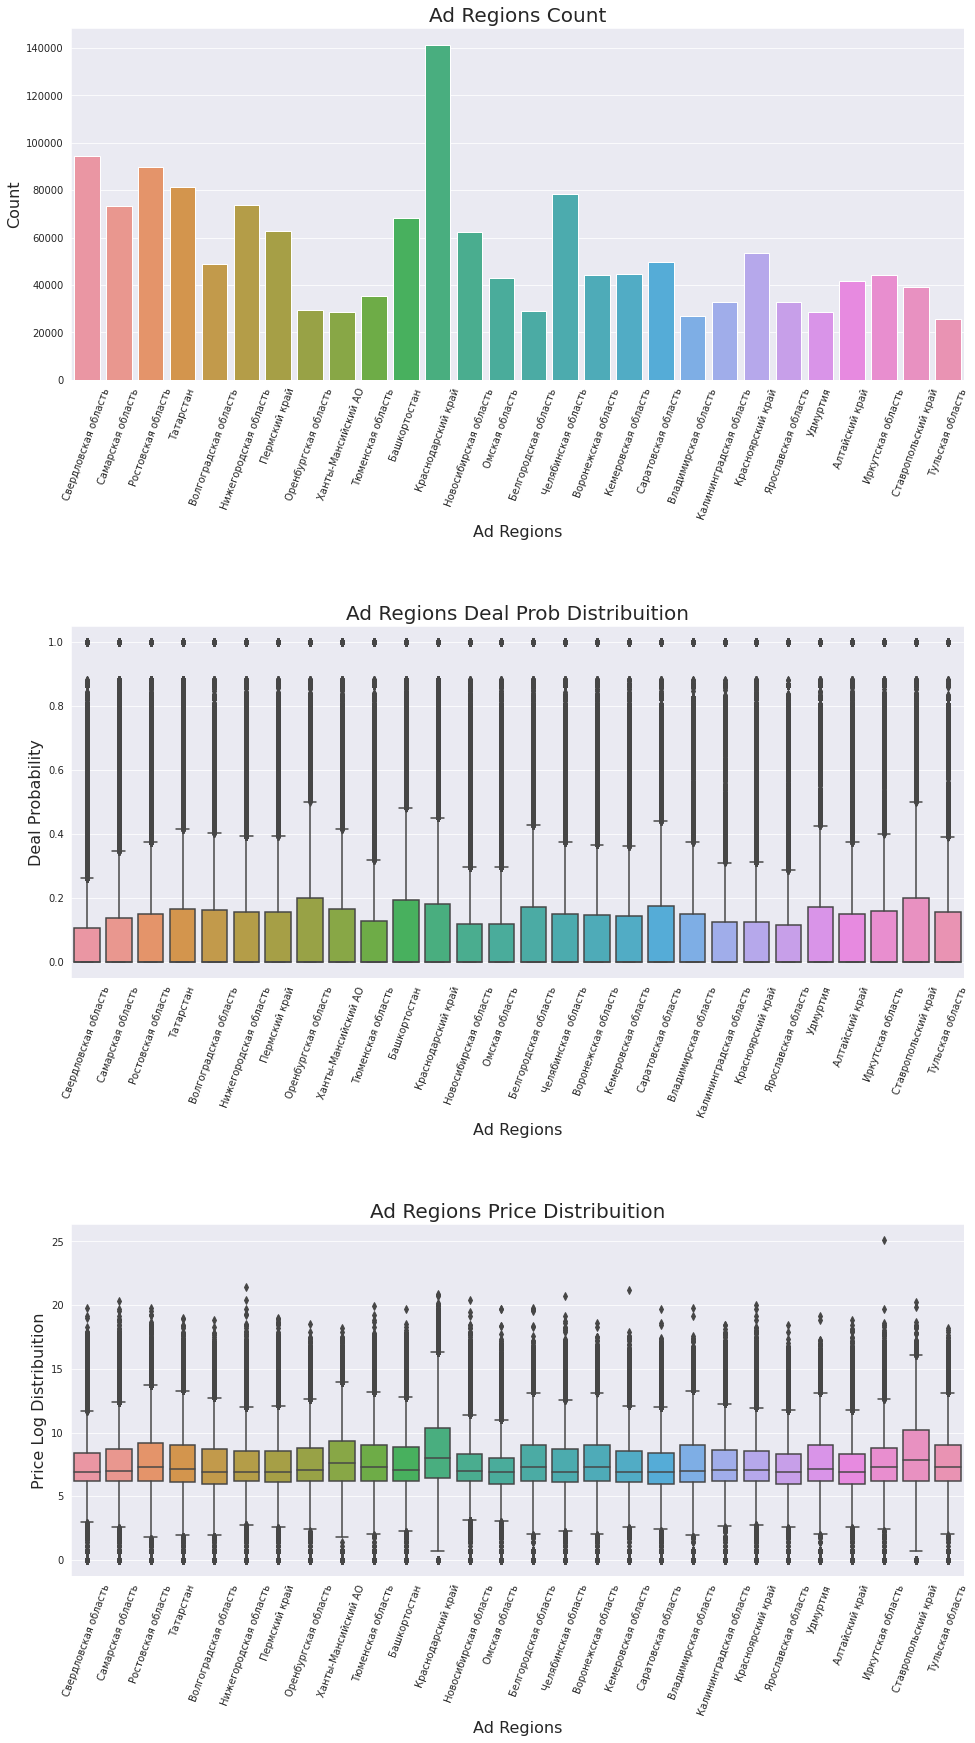

In [52]:
plt.figure(figsize=(16,20))
plt.subplot(3,1,1)
g = sns.countplot(x='region', data=df_train)
g.set_xlabel('Ad Regions', fontsize=16)
g.set_ylabel('Count', fontsize=16)
g.set_title('Ad Regions Count', fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=70)

plt.subplot(3,1,2)
g1 = sns.boxplot(x='region', y='deal_probability',data=df_train)
g1.set_xlabel('Ad Regions', fontsize=16)
g1.set_ylabel('Deal Probability', fontsize=16)
g1.set_title('Ad Regions Deal Prob Distribuition', fontsize=20)
g1.set_xticklabels(g1.get_xticklabels(), rotation=70)

plt.subplot(3,1,3)
g2 = sns.boxplot(x='region', y='price_log',data=df_train)
g2.set_xlabel('Ad Regions', fontsize=16)
g2.set_ylabel('Price Log Distribuition', fontsize=16)
g2.set_title('Ad Regions Price Distribuition', fontsize=20)
g2.set_xticklabels(g2.get_xticklabels(), rotation=70)

plt.subplots_adjust(hspace=0.7, top=1.2);

In [53]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train['region'],
            df_train['deal_prob_cat']).style.background_gradient(cmap=cm)

deal_prob_cat,"(-0.001, 0.1]","(0.1, 0.2]","(0.2, 0.3]","(0.3, 0.4]","(0.4, 0.5]","(0.5, 0.6]","(0.6, 0.7]","(0.7, 0.8]","(0.8, 0.9]","(0.9, 1.0]"
region,,,,,,,,,,
Алтайский край,29045,3720,2249,1386,400,187,140,1501,2724,168
Башкортостан,45528,6350,4309,2715,1208,537,258,3595,3225,566
Белгородская область,19820,2414,1543,1139,467,214,115,1456,1428,272
Владимирская область,18905,2108,1307,740,320,165,127,1290,1632,147
Волгоградская область,33964,3998,2508,1703,674,335,203,2490,2583,540
Воронежская область,31347,3321,1955,1384,593,268,159,2237,2549,303
Иркутская область,30078,4244,2731,1485,565,260,170,1708,2511,278
Калининградская область,24045,2362,1318,770,285,147,104,1204,2380,141
Кемеровская область,31443,3884,2296,1420,458,214,152,1821,2787,160


In [54]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train['region'],
            df_train['deal_prob_cat'],
            normalize='index').style.background_gradient(cmap=cm)

deal_prob_cat,"(-0.001, 0.1]","(0.1, 0.2]","(0.2, 0.3]","(0.3, 0.4]","(0.4, 0.5]","(0.5, 0.6]","(0.6, 0.7]","(0.7, 0.8]","(0.8, 0.9]","(0.9, 1.0]"
region,,,,,,,,,,
Алтайский край,0.699542,0.089595,0.054167,0.033382,0.009634,0.004504,0.003372,0.036151,0.065607,0.004046
Башкортостан,0.666676,0.092984,0.063098,0.039756,0.017689,0.007863,0.003778,0.052642,0.047224,0.008288
Белгородская область,0.686573,0.083622,0.053450,0.039455,0.016177,0.007413,0.003984,0.050436,0.049467,0.009422
Владимирская область,0.706967,0.078830,0.048876,0.027673,0.011967,0.006170,0.004749,0.048241,0.061030,0.005497
Волгоградская область,0.693171,0.081595,0.051186,0.034757,0.013756,0.006837,0.004143,0.050818,0.052716,0.011021
Воронежская область,0.710559,0.075279,0.044315,0.031372,0.013442,0.006075,0.003604,0.050707,0.057779,0.006868
Иркутская область,0.683125,0.096389,0.062026,0.033727,0.012832,0.005905,0.003861,0.038792,0.057029,0.006314
Калининградская область,0.734064,0.072109,0.040237,0.023507,0.008701,0.004488,0.003175,0.036757,0.072658,0.004305
Кемеровская область,0.704447,0.087017,0.051439,0.031814,0.010261,0.004794,0.003405,0.040798,0.062440,0.003585


**param**

In [55]:
params = df_train.param_1.value_counts().head(20)

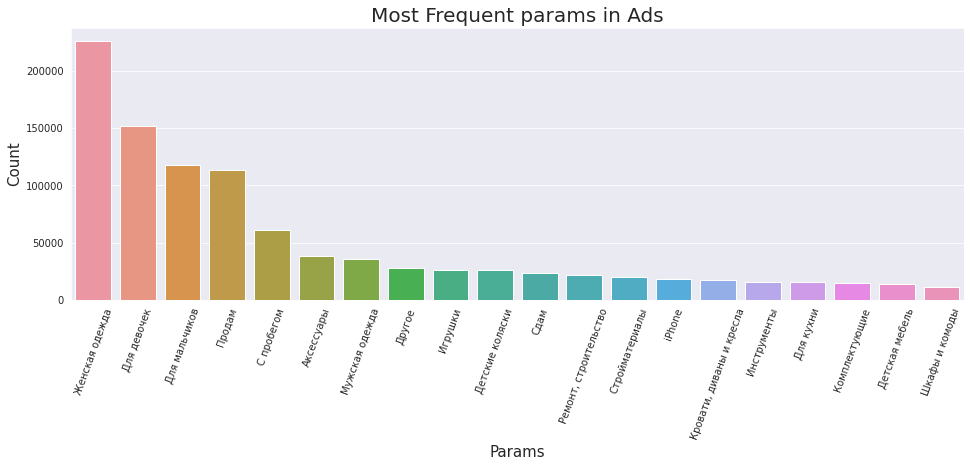

In [56]:
plt.figure(figsize=(16,5))

g = sns.barplot(x=params.index, y=params.values)
g.set_xlabel("Params", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Most Frequent params in Ads", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=70)

plt.show()

In [57]:
print("The top five Ad params in %")
print(round((params / len(df_train) * 100).head(n=5),2))

The top five Ad params in %
Женская одежда   15.050
Для девочек      10.110
Для мальчиков     7.830
Продам            7.570
С пробегом        4.060
Name: param_1, dtype: float64


In [58]:
subset_param = df_train[df_train.param_1.isin(params.index)]
subset_param

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,deal_prob_cat,params,price_log
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,...,3000.000,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.000,0.000,"(-0.001, 0.1]",Другое,8.007
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,40000.000,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.000,0.208,"(0.2, 0.3]",С пробегом ВАЗ (LADA) 2110,10.597
7,6b71309d6a8a,fef86baa002c,Пермский край,Пермь,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Джинсы,26,Бойфренды colins,...,500.000,61,2017-03-25,Private,9bab29a519e81c14f4582024adfebd4f11a4ac71d323a6...,567.000,0.803,"(0.8, 0.9]",Женская одежда Джинсы 26,6.217
8,c5b969cb63a2,055825270190,Оренбургская область,Оренбург,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Платья и юбки,> 50 (XXL),Платье,...,500.000,85,2017-03-17,Private,75ce06d1f939a31dfb2af8ac55f08fa998fa336d13ee05...,415.000,0.000,"(-0.001, 0.1]",Женская одежда Платья и юбки > 50 (XXL),6.217
9,b1570962e68c,f9e8f831d94c,Нижегородская область,Нижний Новгород,Личные вещи,Детская одежда и обувь,Для девочек,Обувь,25,Полу ботиночки замш натур.Бамбини,...,400.000,136,2017-03-22,Company,54fb8521135fda77a860bfd2fac6bf46867ab7c06796e3...,46.000,0.000,"(-0.001, 0.1]",Для девочек Обувь 25,5.994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503419,5e6b7f0f3f65,dd05217165ea,Пермский край,Пермь,Личные вещи,Детская одежда и обувь,Для девочек,Обувь,26,Ботиночки,...,300.000,7,2017-03-20,Private,2da79294c6f23f61d4bf6a8f4034f87e2f318b7e32c68b...,88.000,0.250,"(0.2, 0.3]",Для девочек Обувь 26,5.707
1503420,d1f0910d2126,dc23ef451c8a,Краснодарский край,Краснодар,Услуги,Предложение услуг,"Ремонт, строительство",Ремонт квартиры,NaN,Натяжной потолок,...,200.000,1,2017-03-28,Private,33e13a67b441486ebe48e1459382caa620c4d1802aad1c...,1191.000,0.600,"(0.5, 0.6]","Ремонт, строительство Ремонт квартиры",5.303
1503421,bc04866bc803,66a7016a5995,Башкортостан,Белебей,Недвижимость,Квартиры,Продам,4,Вторичка,"4-к квартира, 83 м², 4/5 эт.",...,NaN,50,2017-03-21,Company,2ae822ca21cff9465e430c68a1df31c5cda658cbc00eb1...,1202.000,0.396,"(0.3, 0.4]",Продам 4 Вторичка,NaN
1503422,f782f2ad9349,2d3ac1f5a7b3,Пермский край,Березники,Личные вещи,Детская одежда и обувь,Для девочек,Обувь,27,Туфли-балетки,...,350.000,33,2017-03-22,Private,6b4285c22388a5dae37c3d390d3e1b174f7a980d9e3919...,87.000,0.000,"(-0.001, 0.1]",Для девочек Обувь 27,5.861


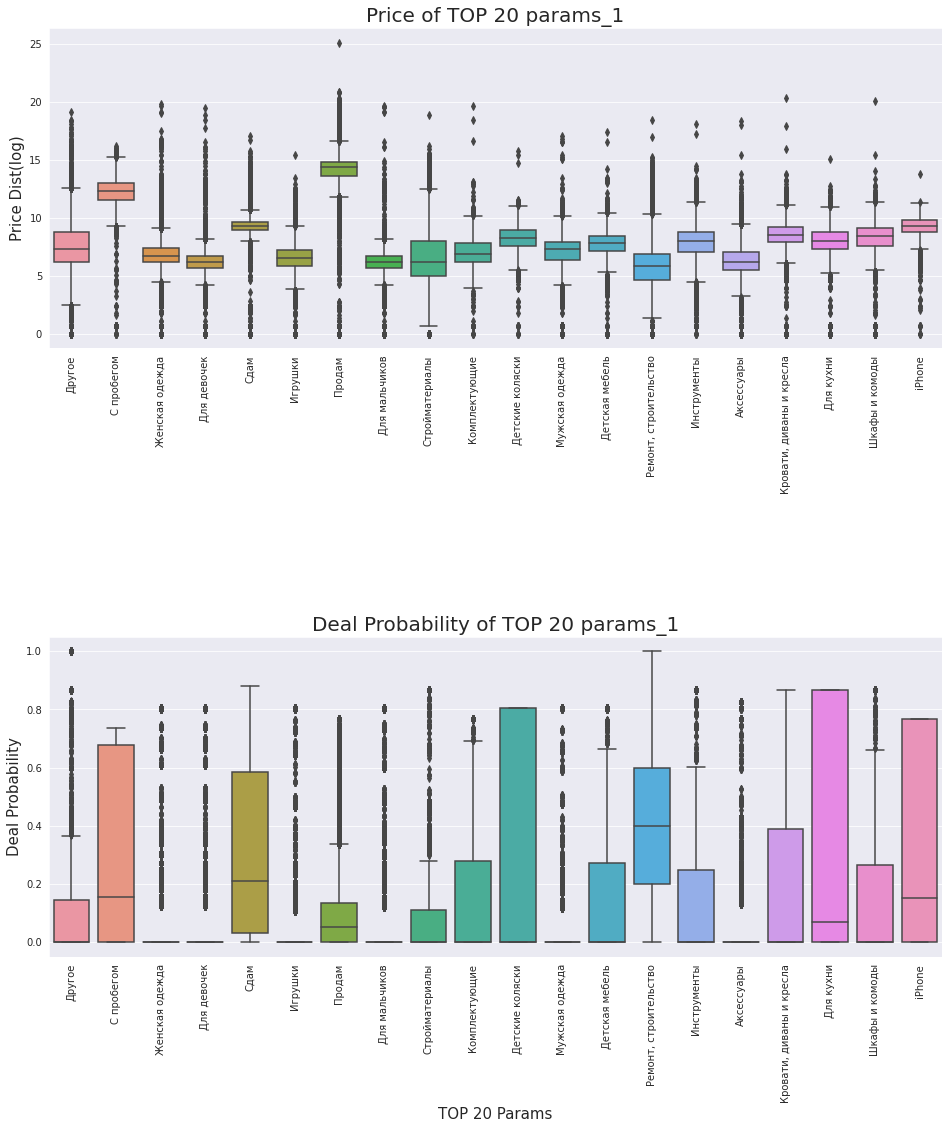

In [59]:
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
g = sns.boxplot(x='param_1', y='price_log', data=subset_param)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Price Dist(log)", fontsize=15)
g.set_title("Price of TOP 20 params_1", fontsize=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='param_1', y='deal_probability', data=subset_param)
g1.set_xlabel("TOP 20 Params", fontsize=15)
g1.set_ylabel("Deal Probability", fontsize=15)
g1.set_title("Deal Probability of TOP 20 params_1", fontsize=20)
g1.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.subplots_adjust(hspace=0.9, top=1.2);

**user_type**

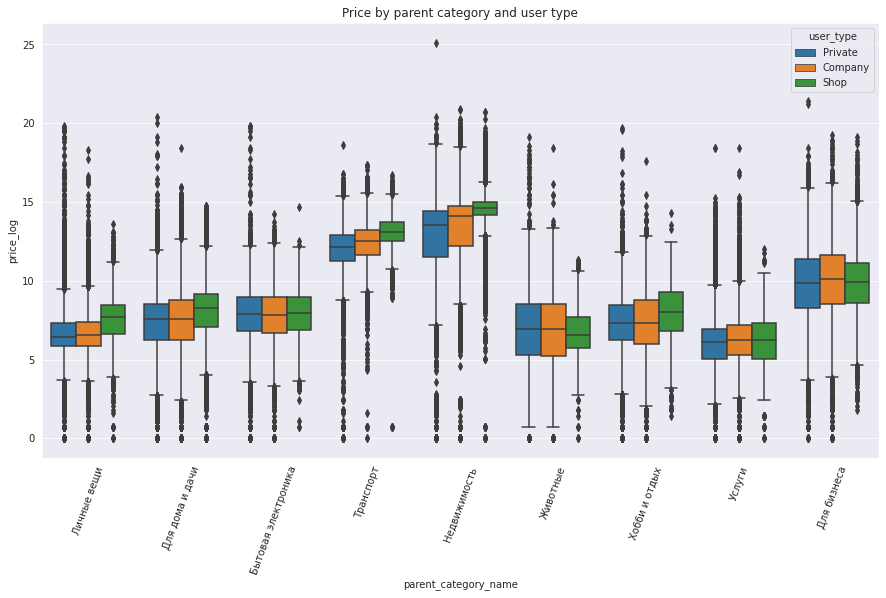

In [60]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="parent_category_name", y="price_log", hue="user_type",  data=df_train)
plt.title("Price by parent category and user type")
plt.xticks(rotation=70);

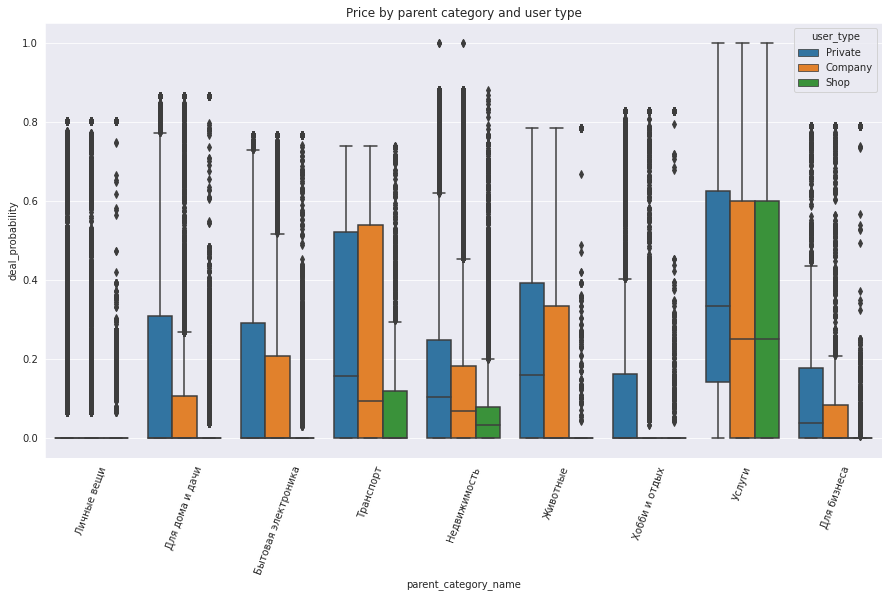

In [61]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="parent_category_name", y="deal_probability", hue="user_type",  data=df_train)
plt.title("Price by parent category and user type")
plt.xticks(rotation=70);

**title**

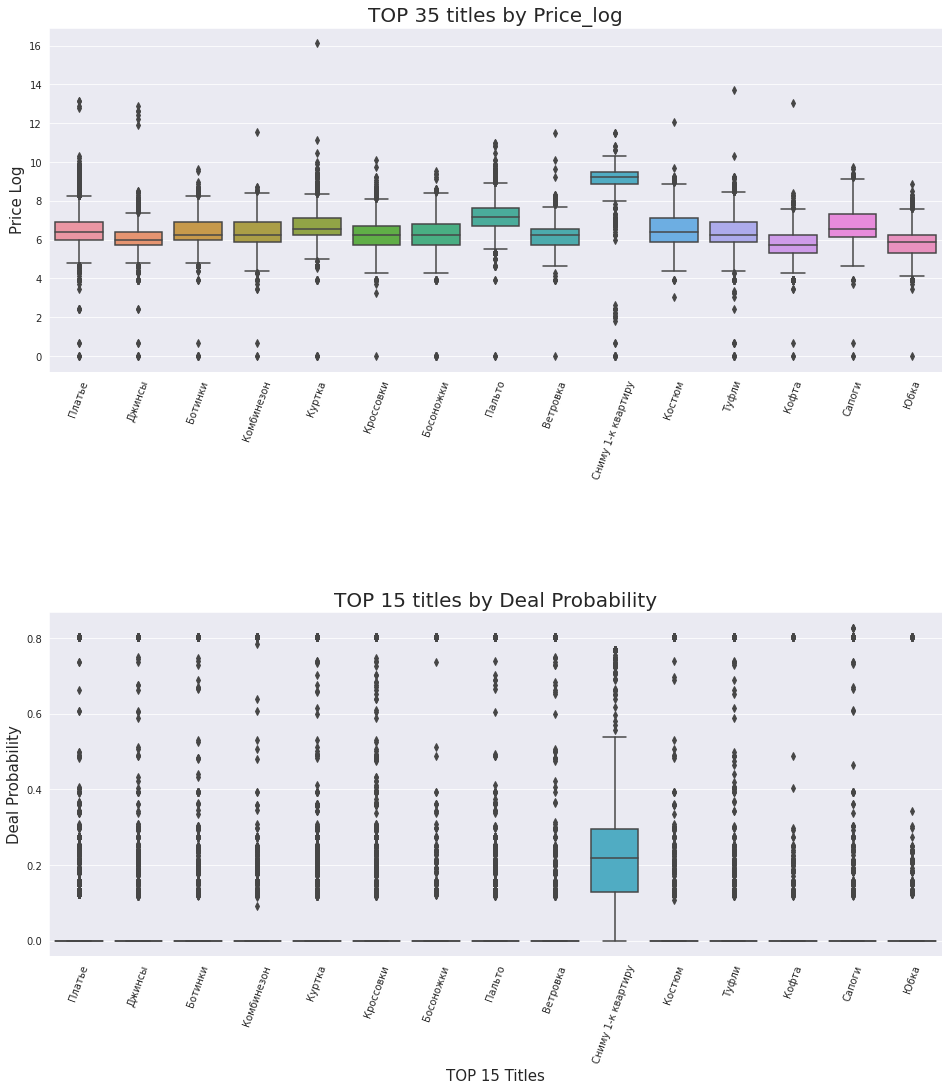

In [62]:
title_freq = df_train.title.value_counts()[:15]

plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
g = sns.boxplot(x='title', y='price_log', 
                data=df_train[df_train.title.isin(title_freq.index.values)])
g.set_xlabel("", fontsize=15)
g.set_ylabel("Price Log", fontsize=15)
g.set_title("TOP 35 titles by Price_log", fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=70)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='title', y='deal_probability', 
                data=df_train[df_train.title.isin(title_freq.index.values)])
g1.set_xlabel("TOP 15 Titles", fontsize=15)
g1.set_ylabel("Deal Probability", fontsize=15)
g1.set_title("TOP 15 titles by Deal Probability", fontsize=20)
g1.set_xticklabels(g1.get_xticklabels(), rotation=70)

plt.subplots_adjust(hspace=0.7, top=1.2)

plt.show()

In [63]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[df_train.title.isin(title_freq.index.values)]['title'], 
            df_train[df_train.title.isin(title_freq.index.values)]['deal_prob_cat'],
            normalize='index').style.background_gradient(cmap=cm)

deal_prob_cat,"(-0.001, 0.1]","(0.1, 0.2]","(0.2, 0.3]","(0.3, 0.4]","(0.4, 0.5]","(0.5, 0.6]","(0.6, 0.7]","(0.7, 0.8]","(0.8, 0.9]"
title,,,,,,,,,
Босоножки,0.911957,0.043478,0.016667,0.003261,0.000362,0.000362,0.000000,0.000362,0.023551
Ботинки,0.823018,0.059805,0.031641,0.007302,0.002086,0.000695,0.002086,0.001043,0.072323
Ветровка,0.861020,0.062911,0.023026,0.002467,0.003289,0.001645,0.002056,0.002467,0.041118
Джинсы,0.885456,0.057797,0.020597,0.002732,0.001261,0.000631,0.001051,0.000631,0.029844
Комбинезон,0.895473,0.057479,0.016201,0.001332,0.000222,0.000444,0.000444,0.000222,0.028185
Костюм,0.903978,0.047325,0.019547,0.004115,0.001029,0.000686,0.000686,0.000343,0.022291
Кофта,0.945241,0.037854,0.008453,0.000000,0.000735,0.000000,0.000000,0.000000,0.007718
Кроссовки,0.770338,0.067584,0.051314,0.010951,0.007196,0.001564,0.003129,0.001877,0.086045
Куртка,0.849629,0.067762,0.030169,0.003475,0.000948,0.000632,0.000632,0.000790,0.045964


In [64]:
from nltk.corpus import stopwords

In [65]:
stopWords = set(stopwords.words('russian'))

Wall time: 43.4 s


CPU times: user 34.8 s, sys: 1.31 s, total: 36.1 s
Wall time: 36.5 s


(-0.5, 999.5, 799.5, -0.5)

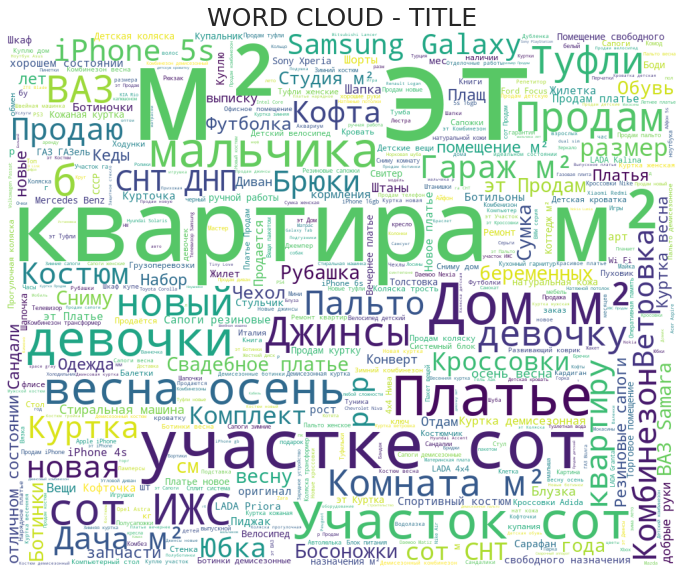

In [67]:
%%time
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white',
                      stopwords=stopWords,
                      max_words=500,
                      max_font_size=200,
                      width=1000, height=800,
                      random_state=42,
                     ).generate(" ".join(df_train['title'].astype(str)))

fig = plt.figure(figsize=(12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLE", fontsize=25)
plt.axis('off');

In [68]:
del wordcloud

**description**

In [69]:
df_train['description'].iloc[2]

'В хорошем состоянии, домашний кинотеатр с blu ray, USB. Если настроить, то работает смарт тв /\nТорг'

In [70]:
df_train['description'] = df_train['description'].apply(lambda x: str(x).replace('/\n', ' '))

Wall time: 55.7 s


In [75]:
%%time
from nltk.util import ngrams
from collections import Counter

text = ' '.join(df_train['description'].values)
text = [i for i in ngrams(text.lower().split(), 3)]
print('Common trigrams.')
Counter(text).most_common(40)

Common trigrams.
CPU times: user 49.3 s, sys: 5.66 s, total: 54.9 s
Wall time: 55.7 s


[(('в', 'отличном', 'состоянии.'), 33512),
 (('в', 'хорошем', 'состоянии.'), 33161),
 (('↓', '↓', '↓'), 28564),
 (('в', 'хорошем', 'состоянии'), 26607),
 (('в', 'отличном', 'состоянии'), 24919),
 (('в', 'отличном', 'состоянии,'), 21344),
 (('в', 'хорошем', 'состоянии,'), 20630),
 (('.', '.', '.'), 17067),
 (('*', '*', '*'), 15395),
 (('в', 'связи', 'с'), 11675),
 (('все', 'вопросы', 'по'), 10777),
 (('в', 'идеальном', 'состоянии.'), 10372),
 (('в', 'шаговой', 'доступности'), 9150),
 (('в', 'очень', 'хорошем'), 7829),
 (('в', 'идеальном', 'состоянии'), 7560),
 (('в', 'идеальном', 'состоянии,'), 7087),
 (('вопросы', 'по', 'телефону.'), 6954),
 (('а', 'так', 'же'), 6567),
 (('вопросы', 'по', 'телефону'), 6065),
 (('ни', 'разу', 'не'), 5329),
 (('цена', 'указана', 'за'), 4435),
 (('так', 'и', 'для'), 4221),
 (('возможен', 'обмен', 'на'), 4117),
 (('по', 'всем', 'вопросам'), 3889),
 (('в', 'любое', 'время'), 3847),
 (('на', 'длительный', 'срок'), 3789),
 (('-', '-', '-'), 3612),
 (('в', 'за

In [76]:
del text

### Модель

In [ ]:
df_train = pd.read_csv("../input/avito-demand-prediction/train.csv")
df_test = pd.read_csv("../input/avito-demand-prediction/test.csv")

df_train.shape, df_test.shape

In [77]:
from nltk.corpus import stopwords

stopWords = set(stopwords.words('russian'))

<img src='https://drive.google.com/uc?export=view&id=14nvoZ71VqMfYBY6ff_7_Btx-tVwL_4lB' width=800>

In [80]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopWords, max_features=2000)
vectorizer.fit(df_train['title'])

train_title = vectorizer.transform(df_train['title'])
test_title = vectorizer.transform(df_test['title'])

CPU times: user 29.4 s, sys: 60.5 ms, total: 29.5 s
Wall time: 29.6 s


In [81]:
train_title

<1503424x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3140343 stored elements in Compressed Sparse Row format>

In [82]:
train_title_df = pd.DataFrame.sparse.from_spmatrix(train_title, columns=vectorizer.get_feature_names_out())
train_title_df

,01,02,03,10,100,1000,101,102,104,105,...,юбку,юбочка,юничел,ядерный,ядра,язык,языку,яйца,яйцо,ящик
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503419,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1503420,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1503421,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1503422,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [83]:
test_title_df = pd.DataFrame.sparse.from_spmatrix(test_title, columns=vectorizer.get_feature_names_out())
test_title_df

,01,02,03,10,100,1000,101,102,104,105,...,юбку,юбочка,юничел,ядерный,ядра,язык,языку,яйца,яйцо,ящик
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508433,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
508434,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
508435,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
508436,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [84]:
del train_title, test_title

In [85]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [86]:
df_train.isna().sum()

item_id                      0
user_id                      0
region                       0
city                         0
parent_category_name         0
category_name                0
param_1                  61576
param_2                 654542
param_3                 862565
title                        0
description                  0
price                    85362
item_seq_number              0
activation_date              0
user_type                    0
image                   112588
image_top_1             112588
deal_probability             0
deal_prob_cat                0
params                       0
price_log                85362
dtype: int64

In [87]:
df_test.isna().sum()

item_id                      0
user_id                      0
region                       0
city                         0
parent_category_name         0
category_name                0
param_1                  22910
param_2                 233229
param_3                 306331
title                        0
description                  0
price                    30585
item_seq_number              0
activation_date              0
user_type                    0
image                    42609
image_top_1              42609
dtype: int64

In [88]:
df_train['price'] = df_train['price'].fillna(df_train['price'].mean())
df_test['price'] = df_test['price'].fillna(df_train['price'].mean())

df_test.isna().sum()

item_id                      0
user_id                      0
region                       0
city                         0
parent_category_name         0
category_name                0
param_1                  22910
param_2                 233229
param_3                 306331
title                        0
description                  0
price                        0
item_seq_number              0
activation_date              0
user_type                    0
image                    42609
image_top_1              42609
dtype: int64

In [89]:
for col in ['param_1', 'param_2', 'param_3', 'image_top_1', 'title', 'description']:
    df_train[col] = df_train[col].fillna('')
    df_test[col] = df_test[col].fillna('')
    
df_test.isna().sum()

item_id                     0
user_id                     0
region                      0
city                        0
parent_category_name        0
category_name               0
param_1                     0
param_2                     0
param_3                     0
title                       0
description                 0
price                       0
item_seq_number             0
activation_date             0
user_type                   0
image                   42609
image_top_1                 0
dtype: int64

In [90]:
df_train['image_top_1'] = df_train['image_top_1'].astype('str')
df_test['image_top_1'] = df_test['image_top_1'].astype('str')    

In [91]:
cat_features = ['region', 'city', 'parent_category_name', 'category_name', 'param_1', 'param_2', 'param_3', 'user_type', 'image_top_1']
text_features = ['title', 'description']

df_train.drop(['image', 'item_id', 'user_id', 'activation_date'], axis=1, inplace=True)
df_test.drop(['image', 'item_id', 'user_id', 'activation_date'], axis=1, inplace=True)

In [98]:
del_cols = ['deal_prob_cat', 'params', 'price_log']

for col in del_cols:
    if col in df_train.columns:
        df_train = df_train.drop(columns=col)
    if col in df_test.columns:
        df_test = df_test.drop(columns=col)

df_train.head()

,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,user_type,image_top_1,deal_probability
0,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,,,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.000,2,Private,1008.0,0.128
1,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,,,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.000,19,Private,692.0,0.000
2,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",,,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.000,9,Private,3032.0,0.432
3,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,,,Автокресло,Продам кресло от0-25кг,2200.000,286,Company,796.0,0.803
4,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.000,3,Private,2264.0,0.208


In [100]:
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split


X = df_train.drop(columns=['deal_probability', 'title', 'description'])
X_test = df_test.drop(columns=['title', 'description'])

y = df_train['deal_probability']

In [101]:
X.dtypes

region                   object
city                     object
parent_category_name     object
category_name            object
param_1                  object
param_2                  object
param_3                  object
price                   float64
item_seq_number           int64
user_type                object
image_top_1              object
dtype: object

In [102]:
from sklearn.model_selection import StratifiedKFold


spliter = StratifiedKFold(n_splits=5, shuffle=True,
                          random_state=3)

_y = (df_train.deal_probability.round(2)*100).astype(int)

FOLD_LIST = list(spliter.split(_y, _y))

In [103]:
FOLD_LIST

[(array([      0,       1,       2, ..., 1503421, 1503422, 1503423]),
  array([      3,       7,      19, ..., 1503405, 1503414, 1503419])),
 (array([      1,       3,       4, ..., 1503421, 1503422, 1503423]),
  array([      0,       2,       9, ..., 1503413, 1503416, 1503418])),
 (array([      0,       1,       2, ..., 1503419, 1503421, 1503423]),
  array([      4,       6,      11, ..., 1503415, 1503420, 1503422])),
 (array([      0,       1,       2, ..., 1503420, 1503422, 1503423]),
  array([      5,      16,      25, ..., 1503398, 1503408, 1503421])),
 (array([      0,       2,       3, ..., 1503420, 1503421, 1503422]),
  array([      1,       8,      15, ..., 1503399, 1503417, 1503423]))]

In [104]:
from catboost import CatBoostRegressor, Pool
from tqdm import tqdm_notebook


_models = []

oof_predictions = np.zeros(shape=[X.shape[0]])

for fold_id, (train_idx, val_idx) in tqdm_notebook(enumerate(FOLD_LIST)):
    
    X_train, Y_train = X.loc[train_idx], y.loc[train_idx]
    X_val, Y_val = X.loc[val_idx], y.loc[val_idx]
    
    train_dataset = Pool(X_train, Y_train,
                         cat_features=cat_features)
    
    eval_dataset = Pool(X_val, Y_val,
                        cat_features=cat_features)
    
    model = CatBoostRegressor(
        learning_rate=0.1, iterations=1000, eval_metric='RMSE',
        metric_period=50, early_stopping_rounds=20, task_type="GPU",
    )
    model.fit(train_dataset, eval_set=eval_dataset)
    
    _models.append(model)
    preds = model.predict(X_val)
    oof_predictions[val_idx] += preds
    print('fold_id:', fold_id, rmse(Y_val, preds))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == "__main__":


0it [00:00, ?it/s]

0:	learn: 0.2560524	test: 0.2560451	best: 0.2560451 (0)	total: 94.5ms	remaining: 1m 34s
50:	learn: 0.2311016	test: 0.2309929	best: 0.2309929 (50)	total: 5.05s	remaining: 1m 33s
100:	learn: 0.2292801	test: 0.2290893	best: 0.2290893 (100)	total: 10.1s	remaining: 1m 29s
150:	learn: 0.2284162	test: 0.2281871	best: 0.2281871 (150)	total: 14.6s	remaining: 1m 21s
200:	learn: 0.2277693	test: 0.2275413	best: 0.2275413 (200)	total: 19.1s	remaining: 1m 15s
250:	learn: 0.2273383	test: 0.2271155	best: 0.2271155 (250)	total: 23.7s	remaining: 1m 10s
300:	learn: 0.2270151	test: 0.2268308	best: 0.2268308 (300)	total: 28.1s	remaining: 1m 5s
350:	learn: 0.2267503	test: 0.2266110	best: 0.2266110 (350)	total: 32.7s	remaining: 1m
400:	learn: 0.2265190	test: 0.2264154	best: 0.2264154 (400)	total: 37.1s	remaining: 55.3s
450:	learn: 0.2263197	test: 0.2262632	best: 0.2262632 (450)	total: 41.8s	remaining: 50.9s
500:	learn: 0.2261658	test: 0.2261423	best: 0.2261423 (500)	total: 46.4s	remaining: 46.2s
550:	learn: 

In [105]:
oof_predictions

array([0.08352376, 0.11016134, 0.19419894, ..., 0.17738751, 0.06523327,
       0.10252745])

In [106]:
oof_predictions /= len(FOLD_LIST)
oof_predictions

array([0.01670475, 0.02203227, 0.03883979, ..., 0.0354775 , 0.01304665,
       0.02050549])

In [107]:
rmse(oof_predictions, y)

0.2721384662181472

**+ tfidf features**

```
CatBoostError: catboost/libs/data/features_layout.cpp:109: All feature names should be different, but 'price' used more than once.
```


In [108]:
df_train.rename(columns={'price': 'ad_price'}, inplace=True)
df_test.rename(columns={'price': 'ad_price'}, inplace=True)

In [109]:
df_train_tfidf_title = pd.concat([df_train, train_title_df], axis=1)
df_train_tfidf_title.shape

(1503424, 2014)

In [110]:
del train_title_df

In [111]:
df_test_tfidf_title = pd.concat([df_test, test_title_df], axis=1)
df_test_tfidf_title.shape

(508438, 2013)

In [112]:
del test_title_df

In [113]:
X = df_train_tfidf_title.drop(columns=['deal_probability', 'title', 'description'])
X_test = df_test_tfidf_title.drop(columns=['title', 'description'])

y = df_train_tfidf_title['deal_probability']

In [114]:
del df_train_tfidf_title, df_test_tfidf_title

In [115]:
from catboost import CatBoostRegressor, Pool
from tqdm import tqdm_notebook


_models_tfidf = []

oof_predictions = np.zeros(shape=[X.shape[0]])

for fold_id, (train_idx, val_idx) in tqdm_notebook(enumerate(FOLD_LIST)):
    
    X_train, Y_train = X.loc[train_idx], y.loc[train_idx]
    X_val, Y_val = X.loc[val_idx], y.loc[val_idx]
    
    train_dataset = Pool(X_train, Y_train,
                         cat_features=cat_features)
    
    eval_dataset = Pool(X_val, Y_val,
                        cat_features=cat_features)
    
    model = CatBoostRegressor(
        learning_rate=0.1, iterations=1000, eval_metric='RMSE',
        metric_period=50, early_stopping_rounds=20, task_type="GPU",
    )
    model.fit(train_dataset, eval_set=eval_dataset)
    
    _models_tfidf.append(model)
    preds = model.predict(X_val)
    oof_predictions[val_idx] += preds
    print('fold_id:', fold_id, rmse(Y_val, preds))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == "__main__":


0it [00:00, ?it/s]

0:	learn: 0.2561213	test: 0.2561307	best: 0.2561307 (0)	total: 162ms	remaining: 2m 42s
50:	learn: 0.2313687	test: 0.2313183	best: 0.2313183 (50)	total: 7.87s	remaining: 2m 26s
100:	learn: 0.2299119	test: 0.2298506	best: 0.2298506 (100)	total: 16s	remaining: 2m 22s
150:	learn: 0.2290223	test: 0.2289709	best: 0.2289709 (150)	total: 23.1s	remaining: 2m 9s
200:	learn: 0.2283316	test: 0.2283111	best: 0.2283111 (200)	total: 30.3s	remaining: 2m
250:	learn: 0.2278402	test: 0.2278366	best: 0.2278366 (250)	total: 37.6s	remaining: 1m 52s
300:	learn: 0.2273662	test: 0.2273955	best: 0.2273955 (300)	total: 44.7s	remaining: 1m 43s
350:	learn: 0.2269931	test: 0.2270581	best: 0.2270581 (350)	total: 52.6s	remaining: 1m 37s
400:	learn: 0.2266533	test: 0.2267563	best: 0.2267563 (400)	total: 60s	remaining: 1m 29s
450:	learn: 0.2263401	test: 0.2264796	best: 0.2264796 (450)	total: 1m 7s	remaining: 1m 21s
500:	learn: 0.2261024	test: 0.2262919	best: 0.2262919 (500)	total: 1m 14s	remaining: 1m 14s
550:	learn: 0

In [116]:
oof_predictions /= len(FOLD_LIST)
oof_predictions

array([0.01904953, 0.02250191, 0.03608296, ..., 0.03240609, 0.01146736,
       0.02130794])

In [117]:
rmse(oof_predictions, y)

0.27222571019268227

**predictions**

In [118]:
pred = np.zeros(shape=[X_test.shape[0]])

for model in tqdm_notebook(_models):
# for model in tqdm_notebook(_models_tfidf):
    preds = model.predict(X_test)
    pred += preds

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/5 [00:00<?, ?it/s]

In [119]:
pred /= len(_models)
# pred /= len(_models_tfidf)

pred

array([0.33178789, 0.2838825 , 0.42329378, ..., 0.29669451, 0.33245393,
       0.19975763])

In [120]:
sample_sub = pd.read_csv('../input/avito-demand-prediction/sample_submission.csv')
sample_sub

,item_id,deal_probability
0,6544e41a8817,0.500
1,65b9484d670f,0.500
2,8bab230b2ecd,0.500
3,8e348601fefc,0.500
4,8bd2fe400b89,0.500
...,...,...
508433,9f2200aed300,0.500
508434,70813f518de4,0.500
508435,a22a2eeb5dd2,0.500
508436,ed7fbb0733c1,0.500


In [121]:
pred = model.predict(X_test)

sample_sub['deal_probability'] = np.clip(pred, 0, 1)
sample_sub.to_csv('sub.csv', index=False)

In [122]:
sample_sub

,item_id,deal_probability
0,6544e41a8817,0.338
1,65b9484d670f,0.292
2,8bab230b2ecd,0.399
3,8e348601fefc,0.382
4,8bd2fe400b89,0.718
...,...,...
508433,9f2200aed300,0.422
508434,70813f518de4,0.528
508435,a22a2eeb5dd2,0.297
508436,ed7fbb0733c1,0.305
